progression d'utilisation par arrondissement des stations belib
prevision des besoins en bornes belib a paris a partir des données historiques.

faire des clusters en fonction du typage des prises par station et voir si les stations avec les typages les plus puissants sont dans des quartiers riches ou non

install and import Prophet library

## Libraries

Importing the needed packages

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import folium

Importing the Dataset

In [391]:
data = pd.read_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib-points-de-recharge-pour-vehicules-electriques-donnees-statiques.csv', sep=';')

In [392]:
data.shape

(2084, 42)

### Completing my data set with in real time data

In [393]:
in_real_time = pd.read_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib-points-de-recharge-pour-vehicules-electriques-disponibilite-temps-reel.csv', sep=';')

In [394]:
in_real_time.head(2)

,ID PDC local,Statut du point de recharge,URL Description Point de charge,Heure mise à jour,Coordonnées géographiques,Adresse station,Code INSEE commune,Arrondissement
0,FR*V75*EPX08*11*6,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.8737,2.314663",37 Rue la Boétie 75008 Paris,75108.0,08e Arrondissement
1,FR*V75*EPX08*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.872833,2.3193886",66 Rue d'Astorg 75008 Paris,75108.0,08e Arrondissement


In [395]:
in_real_time['Statut du point de recharge'].unique()

array(['En maintenance', 'Inconnu', 'Disponible', 'Occupé (en charge)'],
      dtype=object)

In [396]:
in_real_time.shape


(2084, 8)

In [397]:
df=data.merge(in_real_time, left_index= True, right_index= True)

In [398]:
df.head()

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Horaires,Raccordement,ID PDC local_y,Statut du point de recharge,URL Description Point de charge,Heure mise à jour,Coordonnées géographiques_y,Adresse station_y,Code INSEE commune_y,Arrondissement_y
0,FR*V75*E9006*02*3,En service,06e Arrondissement,FR*V75*P9006*02,FRV75P900602,Paris | Rue de Medicis 11,75106.0,Voirie,3,2021-09-23,...,24/7,Direct,FR*V75*EPX08*11*6,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.8737,2.314663",37 Rue la Boétie 75008 Paris,75108.0,08e Arrondissement
1,FR*V75*E9009*01*2,En service,09e Arrondissement,FR*V75*P9009*01,FRV75P900901,Paris | Boulevard de Clichy 31,75109.0,Voirie,3,2021-09-23,...,24/7,Direct,FR*V75*EPX08*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.872833,2.3193886",66 Rue d'Astorg 75008 Paris,75108.0,08e Arrondissement
2,FR*V75*E9013*04*1,En service,13e Arrondissement,FR*V75*P9013*04,FRV75P901304,Paris | Rue de l'Amiral Mouchez 77,75113.0,Voirie,3,2021-09-23,...,24/7,Direct,FR*V75*EPX11*05*2,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.865765,2.3664377",8 Boulevard Voltaire 75011 Paris,75111.0,11e Arrondissement
3,FR*V75*E9014*03*3,En service,14e Arrondissement,FR*V75*P9014*03,FRV75P901403,Paris | Boulevard Edgar Quinet 9,75114.0,Voirie,3,2021-09-23,...,24/7,Direct,FR*V75*EPX06*02*1,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.85262,2.342107",8 Rue Danton 75006 Paris,75106.0,06e Arrondissement
4,FR*V75*E9016*06*1,En service,16e Arrondissement,FR*V75*P9016*06,FRV75P901606,Paris | Avenue Victor Hugo 45,75116.0,Voirie,3,2021-09-23,...,24/7,Direct,FR*V75*EPX11*05*4,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,"48.865765,2.3664377",8 Boulevard Voltaire 75011 Paris,75111.0,11e Arrondissement


In [399]:
df.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Coordonnées géographiques_x', 'Gratuité', 'Paiement à l'acte',
       'Paiement CB', 'Paiement autres', 'Réservation', 'Observations',
       'SIREN aménageur', 'Contact aménageur', 'Nom aménageur',
       'Nom opérateur', 'Contact opérateur', 'Téléphone opérateur',
       'Nom enseigne', 'Tarification', 'ID PDC itinérance',
       'Date mise en service', 'Accessibilité PMR', 'Restriction gabarit',
       'Stationnement 2 roues', 'Puissance max KW', 'Prise type EF',
       'Prise type 2', 'Prise type Combo CCS', 'Prise type Chademo',
       'Prise type Autre', 'Prise type 3',
       'Numéro point livraison électricité', 'Horaires', 'Raccordement',
       'ID PDC local_y', 'Statut du point de 

In [400]:
df.drop(columns=['Adresse station_y','Code INSEE commune_y','Arrondissement_y'], axis=1, inplace=True)

In [401]:
df.drop(columns=['Coordonnées géographiques_y','ID PDC local_y'], axis=1, inplace=True)

In [402]:
data=df

## Data Overview

Getting the top 5 values 

In [403]:
data.head()

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Prise type Combo CCS,Prise type Chademo,Prise type Autre,Prise type 3,Numéro point livraison électricité,Horaires,Raccordement,Statut du point de recharge,URL Description Point de charge,Heure mise à jour
0,FR*V75*E9006*02*3,En service,06e Arrondissement,FR*V75*P9006*02,FRV75P900602,Paris | Rue de Medicis 11,75106.0,Voirie,3,2021-09-23,...,True,True,False,True,7.319537e+12,24/7,Direct,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00
1,FR*V75*E9009*01*2,En service,09e Arrondissement,FR*V75*P9009*01,FRV75P900901,Paris | Boulevard de Clichy 31,75109.0,Voirie,3,2021-09-23,...,False,False,False,False,7.198119e+12,24/7,Direct,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00
2,FR*V75*E9013*04*1,En service,13e Arrondissement,FR*V75*P9013*04,FRV75P901304,Paris | Rue de l'Amiral Mouchez 77,75113.0,Voirie,3,2021-09-23,...,True,True,False,True,7.320260e+12,24/7,Direct,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00
3,FR*V75*E9014*03*3,En service,14e Arrondissement,FR*V75*P9014*03,FRV75P901403,Paris | Boulevard Edgar Quinet 9,75114.0,Voirie,3,2021-09-23,...,True,True,False,True,7.329378e+12,24/7,Direct,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00
4,FR*V75*E9016*06*1,En service,16e Arrondissement,FR*V75*P9016*06,FRV75P901606,Paris | Avenue Victor Hugo 45,75116.0,Voirie,3,2021-09-23,...,True,True,False,True,7.439363e+12,24/7,Direct,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00


 Getting the bottom 5 values

In [404]:
data.tail()

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Prise type Combo CCS,Prise type Chademo,Prise type Autre,Prise type 3,Numéro point livraison électricité,Horaires,Raccordement,Statut du point de recharge,URL Description Point de charge,Heure mise à jour
2079,FR*V75*EPX19*16*4,En service,19e Arrondissement,FR*V75*PPX19*16,FRV75PPX1916,Paris | Rue Manin 1,75119.0,Voirie,4,2021-09-23,...,False,False,False,False,7.287409e+12,24/7,Direct,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T14:39:06+01:00
2080,FR*V75*EPX13*21*2,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,False,False,False,False,7.372648e+12,24/7,Direct,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:00:02+01:00
2081,FR*V75*EPX13*21*3,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,False,False,False,False,7.372648e+12,24/7,Direct,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:01:05+01:00
2082,FR*V75*EHBSAE*PDA*02*1,En service,16e Arrondissement,FR*V75*PHBSAE*PDA,FRV75PHBSAEPDA,Paris | SAEMES Parking Porte d'Auteuil,16116.0,Parking public,15,2022-08-19,...,False,False,False,False,NaN,24/7,Direct,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:06:06+01:00
2083,FR*V75*EHBSAE*PDA*03*1,En service,16e Arrondissement,FR*V75*PHBSAE*PDA,FRV75PHBSAEPDA,Paris | SAEMES Parking Porte d'Auteuil,16116.0,Parking public,15,2022-08-19,...,False,False,False,False,NaN,24/7,Direct,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:09:48+01:00


Getting the the shape of my data set

In [405]:
data.shape

(2084, 45)

Finding out the type and number of entries

In [406]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID PDC local_x                      2073 non-null   object 
 1   Statut du Point de charge           2084 non-null   object 
 2   Arrondissement_x                    2084 non-null   object 
 3   ID Station local                    2084 non-null   object 
 4   ID Station itinérance               2084 non-null   object 
 5   Nom station                         2084 non-null   object 
 6   Code INSEE commune_x                2082 non-null   float64
 7   Type implantation                   2082 non-null   object 
 8   Nombre point de recharge            2084 non-null   int64  
 9   Date mise à jour                    2084 non-null   object 
 10  Conditions d'accès                  2084 non-null   object 
 11  Adresse station_x                   2084 no

In [407]:
data['Nombre point de recharge'].unique()

array([ 3,  4,  6,  5,  7,  2, 21, 15,  0], dtype=int64)

In [408]:
data['Nombre point de recharge'].value_counts()

6     876
5     380
3     276
7     273
4     228
21     21
15     15
0      11
2       4
Name: Nombre point de recharge, dtype: int64

Checking from when to when my data was collected

In [409]:
#check how hold is the data
data['Date mise à jour'].min()

'2021-09-21'

In [410]:
#when was the last update
data['Date mise à jour'].max()

'2022-11-22'

In [411]:
#What does each numerical column mean?
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Code INSEE commune_x,2082.0,7.468738e+04,4.990745e+03,1.611600e+04,7.510800e+04,7.511300e+04,7.511600e+04,7.512000e+04
Nombre point de recharge,2084.0,5.509117e+00,2.185232e+00,0.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,2.100000e+01
SIREN aménageur,2084.0,5.316804e+08,0.000000e+00,5.316804e+08,5.316804e+08,5.316804e+08,5.316804e+08,5.316804e+08
Puissance max KW,2073.0,8.560540e+00,6.816424e+00,3.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,5.000000e+01
Numéro point livraison électricité,2058.0,8.214386e+12,5.967647e+12,7.112156e+12,7.268596e+12,7.379450e+12,7.467004e+12,5.009285e+13


## Data Cleaning

Looking for any missing values

In [412]:
# Any missing data to remove?
a = data.isnull().sum().sort_values(ascending=False)

In [413]:
type(a)

pandas.core.series.Series

In [414]:
a

Date mise en service                  52
Accessibilité PMR                     26
Restriction gabarit                   26
Numéro point livraison électricité    26
ID PDC local_x                        11
Prise type Combo CCS                  11
ID PDC itinérance                     11
Stationnement 2 roues                 11
Puissance max KW                      11
Prise type EF                         11
Prise type 2                          11
Prise type Chademo                    11
Prise type Autre                      11
Prise type 3                          11
Type implantation                      2
Code INSEE commune_x                   2
Raccordement                           2
Téléphone opérateur                    0
Horaires                               0
Statut du point de recharge            0
URL Description Point de charge        0
Tarification                           0
Nom enseigne                           0
Nom opérateur                          0
Contact opérateu

check the variance of the values in each column with missing values and them replace them by the mode

In [415]:
data['Restriction gabarit'].value_counts()

aucune restriction        2037
Hauteur maximale 1.90m      21
Name: Restriction gabarit, dtype: int64

In [416]:
data['Restriction gabarit']=data['Restriction gabarit'].replace(np.nan,'aucune restriction')

In [417]:
data['Restriction gabarit'].isna().sum()

0

In [418]:
data['Accessibilité PMR'].value_counts()

Non accessible    2013
Réservé PMR         45
Name: Accessibilité PMR, dtype: int64

In [419]:
data['Accessibilité PMR']=data['Accessibilité PMR'].replace(np.nan,'Non accessible')

In [420]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Coordonnées géographiques_x', 'Gratuité', 'Paiement à l'acte',
       'Paiement CB', 'Paiement autres', 'Réservation', 'Observations',
       'SIREN aménageur', 'Contact aménageur', 'Nom aménageur',
       'Nom opérateur', 'Contact opérateur', 'Téléphone opérateur',
       'Nom enseigne', 'Tarification', 'ID PDC itinérance',
       'Date mise en service', 'Accessibilité PMR', 'Restriction gabarit',
       'Stationnement 2 roues', 'Puissance max KW', 'Prise type EF',
       'Prise type 2', 'Prise type Combo CCS', 'Prise type Chademo',
       'Prise type Autre', 'Prise type 3',
       'Numéro point livraison électricité', 'Horaires', 'Raccordement',
       'Statut du point de recharge', 'URL De

In [421]:
data['Prise type 3'].value_counts()

False    1902
True      171
Name: Prise type 3, dtype: int64

In [422]:
data['Prise type 3']=data['Prise type 3'].replace(np.nan,False)

In [423]:
data['Prise type Autre'].value_counts()

False    2072
True        1
Name: Prise type Autre, dtype: int64

In [424]:
data['Prise type Autre']=data['Prise type Autre'].replace(np.nan, False)

In [425]:
data['Prise type Chademo'].value_counts()

False    1890
True      183
Name: Prise type Chademo, dtype: int64

In [426]:
data['Prise type Chademo']=data['Prise type Chademo'].replace(np.nan,False)

In [427]:
data['Prise type Combo CCS'].value_counts()

False    1890
True      183
Name: Prise type Combo CCS, dtype: int64

In [428]:
data['Prise type Combo CCS']=data['Prise type Combo CCS'].replace(np.nan,False)

In [429]:
data['Prise type 2'].value_counts()

True     1963
False     110
Name: Prise type 2, dtype: int64

In [430]:
data['Prise type 2']=data['Prise type 2'].replace(np.nan,True)

In [431]:
data['Prise type EF'].value_counts()

True     2037
False      36
Name: Prise type EF, dtype: int64

In [432]:
data['Prise type EF']=data['Prise type EF'].replace(np.nan,True)

Create new column charger type

In [433]:
# data['Type de chargeur']= data.apply(lambda _: '', axis=1)

In [434]:
#data['Type de chargeur']

In [435]:
'''data['Type de chargeur'] = np.where(data['Prise type 3']== True, 'Prise type 3', data['Type de chargeur'] )
data['Type de chargeur'] = np.where(data['Prise type Autre']== True, 'Prise type Autre', data['Type de chargeur'] )
data['Type de chargeur'] = np.where(data['Prise type Chademo']== True, 'Prise type Chademo', data['Type de chargeur'] )
data['Type de chargeur'] = np.where(data['Prise type Combo CCS']== True, 'Prise type Combo CCS', data['Type de chargeur'] )
data['Type de chargeur'] = np.where(data['Prise type 2']== True, 'Prise type 2', data['Type de chargeur'] )
data['Type de chargeur'] = np.where(data['Prise type EF']== True, 'Prise type EF', data['Type de chargeur'] )'''

"data['Type de chargeur'] = np.where(data['Prise type 3']== True, 'Prise type 3', data['Type de chargeur'] )\ndata['Type de chargeur'] = np.where(data['Prise type Autre']== True, 'Prise type Autre', data['Type de chargeur'] )\ndata['Type de chargeur'] = np.where(data['Prise type Chademo']== True, 'Prise type Chademo', data['Type de chargeur'] )\ndata['Type de chargeur'] = np.where(data['Prise type Combo CCS']== True, 'Prise type Combo CCS', data['Type de chargeur'] )\ndata['Type de chargeur'] = np.where(data['Prise type 2']== True, 'Prise type 2', data['Type de chargeur'] )\ndata['Type de chargeur'] = np.where(data['Prise type EF']== True, 'Prise type EF', data['Type de chargeur'] )"

In [436]:
data['Puissance max KW'].value_counts()

7.0     1646
22.0     171
3.0      134
4.0       86
50.0      24
43.0      12
Name: Puissance max KW, dtype: int64

In [437]:
data.drop(columns=['Prise type EF','Prise type 2', 'Prise type Combo CCS', 'Prise type Chademo','Prise type Autre', 'Prise type 3'], axis=1, inplace=True)

In [438]:
data.shape

(2084, 39)

In [439]:
data['Puissance max KW'].dtype

dtype('float64')

We can see that it is scewed so we will choose to replace by the mediane.
If it was normally distributed we rather choose the mean.

In [440]:
median_puissanceKW = data['Puissance max KW'].median()

In [441]:
median_puissanceKW

7.0

In [442]:
data['Puissance max KW']=data['Puissance max KW'].replace(np.nan, median_puissanceKW)

In [443]:
data['Stationnement 2 roues'].value_counts()

False    1980
True       93
Name: Stationnement 2 roues, dtype: int64

In [444]:
data['Stationnement 2 roues']=data['Stationnement 2 roues'].replace(np.nan, False)

In [445]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Coordonnées géographiques_x', 'Gratuité', 'Paiement à l'acte',
       'Paiement CB', 'Paiement autres', 'Réservation', 'Observations',
       'SIREN aménageur', 'Contact aménageur', 'Nom aménageur',
       'Nom opérateur', 'Contact opérateur', 'Téléphone opérateur',
       'Nom enseigne', 'Tarification', 'ID PDC itinérance',
       'Date mise en service', 'Accessibilité PMR', 'Restriction gabarit',
       'Stationnement 2 roues', 'Puissance max KW',
       'Numéro point livraison électricité', 'Horaires', 'Raccordement',
       'Statut du point de recharge', 'URL Description Point de charge',
       'Heure mise à jour'],
      dtype='object')

In [446]:
data['Code INSEE commune_x'].value_counts()

75115.0    221
75116.0    205
75117.0    149
75113.0    133
75112.0    128
75120.0    126
75119.0    117
75108.0    116
75107.0    114
75118.0    107
75111.0     98
75114.0     95
75105.0     76
75104.0     70
75110.0     68
75106.0     67
75109.0     57
75102.0     51
75101.0     35
75103.0     34
16116.0     15
Name: Code INSEE commune_x, dtype: int64

### Inconsistencies

I notice a misspelling for 16116.0 instead of 75116.0. Let's correct it!


In [447]:
data['Code INSEE commune_x']=np.where(data['Code INSEE commune_x']== 16116.0, 75116.0, data['Code INSEE commune_x'])

Check the distribution of my column 'Code INSEE commune'

Text(0.5, 1.0, 'Distribution of data in column\n Code INSEE commune')

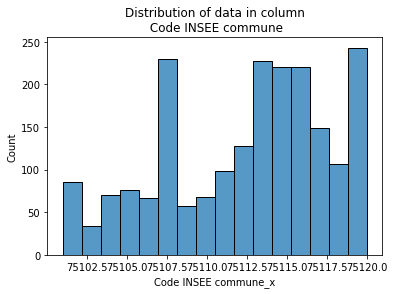

In [448]:
sns.histplot(data=data,x='Code INSEE commune_x')
plt.title('Distribution of data in column\n Code INSEE commune')

We can see that it is scewed so we will choose to replace by the mediane.
If it was normally distributed we rather choose the mean.

In [449]:
median_codeINSEE = data['Code INSEE commune_x'].median()

In [450]:
median_codeINSEE

75113.0

In [451]:
data['Code INSEE commune_x']=data['Code INSEE commune_x'].replace(np.nan,median_codeINSEE)

In [452]:
data['Type implantation'].value_counts()

Voirie            2046
Parking public      36
Name: Type implantation, dtype: int64

In [453]:
data['Type implantation']=data['Type implantation'].replace(np.nan, 'Voirie')

In [454]:
data.isnull().sum().sort_values(ascending=False)

Date mise en service                  52
Numéro point livraison électricité    26
ID PDC local_x                        11
ID PDC itinérance                     11
Raccordement                           2
Nom opérateur                          0
Contact opérateur                      0
Téléphone opérateur                    0
Nom enseigne                           0
Tarification                           0
Restriction gabarit                    0
Accessibilité PMR                      0
Contact aménageur                      0
Stationnement 2 roues                  0
Puissance max KW                       0
Horaires                               0
Statut du point de recharge            0
URL Description Point de charge        0
Nom aménageur                          0
SIREN aménageur                        0
Statut du Point de charge              0
Date mise à jour                       0
Arrondissement_x                       0
ID Station local                       0
ID Station itiné

In [455]:
data['Date mise en service']=data['Date mise en service'].replace(np.nan, 'unknown')

In [456]:
data.isnull().sum().sort_values(ascending=False)

Numéro point livraison électricité    26
ID PDC local_x                        11
ID PDC itinérance                     11
Raccordement                           2
Date mise en service                   0
Nom opérateur                          0
Contact opérateur                      0
Téléphone opérateur                    0
Nom enseigne                           0
Tarification                           0
Restriction gabarit                    0
Accessibilité PMR                      0
Contact aménageur                      0
Stationnement 2 roues                  0
Puissance max KW                       0
Horaires                               0
Statut du point de recharge            0
URL Description Point de charge        0
Nom aménageur                          0
SIREN aménageur                        0
Statut du Point de charge              0
Date mise à jour                       0
Arrondissement_x                       0
ID Station local                       0
ID Station itiné

### Drop columns

In [457]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Coordonnées géographiques_x', 'Gratuité', 'Paiement à l'acte',
       'Paiement CB', 'Paiement autres', 'Réservation', 'Observations',
       'SIREN aménageur', 'Contact aménageur', 'Nom aménageur',
       'Nom opérateur', 'Contact opérateur', 'Téléphone opérateur',
       'Nom enseigne', 'Tarification', 'ID PDC itinérance',
       'Date mise en service', 'Accessibilité PMR', 'Restriction gabarit',
       'Stationnement 2 roues', 'Puissance max KW',
       'Numéro point livraison électricité', 'Horaires', 'Raccordement',
       'Statut du point de recharge', 'URL Description Point de charge',
       'Heure mise à jour'],
      dtype='object')

Removing columns with low variance and with non relevant infos

In [458]:
data.drop(columns=['Numéro point livraison électricité','Raccordement'], axis=1, inplace=True)

In [459]:
data.drop(columns=['ID PDC itinérance','Nom enseigne','Téléphone opérateur','Contact opérateur','Nom opérateur','Nom aménageur','Contact aménageur','SIREN aménageur','Observations'], axis=1, inplace=True)

In [460]:
data.isnull().sum().sort_values(ascending=False)

ID PDC local_x                     11
Statut du Point de charge           0
URL Description Point de charge     0
Statut du point de recharge         0
Horaires                            0
Puissance max KW                    0
Stationnement 2 roues               0
Restriction gabarit                 0
Accessibilité PMR                   0
Date mise en service                0
Tarification                        0
Réservation                         0
Paiement autres                     0
Paiement CB                         0
Paiement à l'acte                   0
Gratuité                            0
Coordonnées géographiques_x         0
Adresse station_x                   0
Conditions d'accès                  0
Date mise à jour                    0
Nombre point de recharge            0
Type implantation                   0
Code INSEE commune_x                0
Nom station                         0
ID Station itinérance               0
ID Station local                    0
Arrondisseme

In [461]:
data.dropna(inplace=True)

In [462]:
data.shape

(2073, 28)

In [463]:
data.isnull().sum().sort_values(ascending=False)

ID PDC local_x                     0
Statut du Point de charge          0
URL Description Point de charge    0
Statut du point de recharge        0
Horaires                           0
Puissance max KW                   0
Stationnement 2 roues              0
Restriction gabarit                0
Accessibilité PMR                  0
Date mise en service               0
Tarification                       0
Réservation                        0
Paiement autres                    0
Paiement CB                        0
Paiement à l'acte                  0
Gratuité                           0
Coordonnées géographiques_x        0
Adresse station_x                  0
Conditions d'accès                 0
Date mise à jour                   0
Nombre point de recharge           0
Type implantation                  0
Code INSEE commune_x               0
Nom station                        0
ID Station itinérance              0
ID Station local                   0
Arrondissement_x                   0
H

### Create new columns 

Split the geo variable 'Coordonnées géographiques' into separate lat and lon variables

In [464]:
data['Coordonnées géographiques_x']

0         48.84824,2.339865
1         48.88264,2.335728
2         48.82085,2.343626
3        48.841198,2.323891
4        48.871464,2.289894
               ...         
2079      48.8766,2.3790176
2080     48.824066,2.364308
2081     48.824066,2.364308
2082    48.846973,2.2558389
2083    48.846973,2.2558389
Name: Coordonnées géographiques_x, Length: 2073, dtype: object

In [465]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in data['Coordonnées géographiques_x']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
data['latitude'] = lat
data['longitude'] = lon

In [466]:
#check the new columns created
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Coordonnées géographiques_x', 'Gratuité', 'Paiement à l'acte',
       'Paiement CB', 'Paiement autres', 'Réservation', 'Tarification',
       'Date mise en service', 'Accessibilité PMR', 'Restriction gabarit',
       'Stationnement 2 roues', 'Puissance max KW', 'Horaires',
       'Statut du point de recharge', 'URL Description Point de charge',
       'Heure mise à jour', 'latitude', 'longitude'],
      dtype='object')

In [467]:
data['latitude']

0        48.84824
1        48.88264
2        48.82085
3       48.841198
4       48.871464
          ...    
2079      48.8766
2080    48.824066
2081    48.824066
2082    48.846973
2083    48.846973
Name: latitude, Length: 2073, dtype: object

In [468]:
data['longitude']

0        2.339865
1        2.335728
2        2.343626
3        2.323891
4        2.289894
          ...    
2079    2.3790176
2080     2.364308
2081     2.364308
2082    2.2558389
2083    2.2558389
Name: longitude, Length: 2073, dtype: object

In [469]:
data.head(2)

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Accessibilité PMR,Restriction gabarit,Stationnement 2 roues,Puissance max KW,Horaires,Statut du point de recharge,URL Description Point de charge,Heure mise à jour,latitude,longitude
0,FR*V75*E9006*02*3,En service,06e Arrondissement,FR*V75*P9006*02,FRV75P900602,Paris | Rue de Medicis 11,75106.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.84824,2.339865
1,FR*V75*E9009*01*2,En service,09e Arrondissement,FR*V75*P9009*01,FRV75P900901,Paris | Boulevard de Clichy 31,75109.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,4.0,24/7,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.88264,2.335728


In [470]:
#drop column 'Coordonnées géographiques' we don't need it anymore
data.drop('Coordonnées géographiques_x', axis=1, inplace=True)

In [471]:
data.shape

(2073, 29)

In [472]:
corr = data.corr()
corr.style.background_gradient (cmap = 'coolwarm')

c:\Users\ABR\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\ABR\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Code INSEE commune_x,Nombre point de recharge,Gratuité,Paiement à l'acte,Paiement CB,Paiement autres,Réservation,Stationnement 2 roues,Puissance max KW
Code INSEE commune_x,1.000000,-0.020694,nan,nan,-0.000739,nan,nan,-0.018014,-0.070909
Nombre point de recharge,-0.020694,1.000000,nan,nan,0.444837,nan,nan,0.080016,0.415154
Gratuité,nan,nan,nan,nan,nan,nan,nan,nan,nan
Paiement à l'acte,nan,nan,nan,nan,nan,nan,nan,nan,nan
Paiement CB,-0.000739,0.444837,nan,nan,1.000000,nan,nan,0.081530,-0.409386
Paiement autres,nan,nan,nan,nan,nan,nan,nan,nan,nan
Réservation,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stationnement 2 roues,-0.018014,0.080016,nan,nan,0.081530,nan,nan,1.000000,-0.174102
Puissance max KW,-0.070909,0.415154,nan,nan,-0.409386,nan,nan,-0.174102,1.000000


In [473]:
data.drop(columns=['Gratuité','Paiement à l\'acte','Paiement autres','Réservation'], axis = 1, inplace=True)

### Creating the map and adding points to the Folium map

In [474]:
data['Nom station'].value_counts()

Paris | SAGS Parking Lobau                21
Paris | SAEMES Parking Porte d'Auteuil    15
Paris | Rue Darmesteter 12                 7
Paris | Rue Claude Decaen 26               7
Paris | bis Rue Valette 2                  7
                                          ..
Paris | Rue de Courcelles 83               3
Paris | Avenue Gourgaud 4                  3
Paris | Rue Baron le Roy 53                3
Paris | Boulevard Voltaire  8              2
Paris | Rue Léon Frot 26                   2
Name: Nom station, Length: 414, dtype: int64

In [475]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour', 'latitude',
       'longitude'],
      dtype='object')

In [476]:
belib_stations = data[data['latitude'].notnull() & data['longitude'].notnull()]

In [477]:
# Create a map centered on Paris
paris_map = folium.Map(location=[48.864716, 2.349014], tiles='openstreetmap', zoom_start=11)

# Add points to the map
for idx, row in belib_stations.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
           popup=row['Adresse station_x']).add_to(paris_map)
           

# Display the map
paris_map

In [478]:
data.to_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib_points_de_recharge_clean2.csv', index=False)